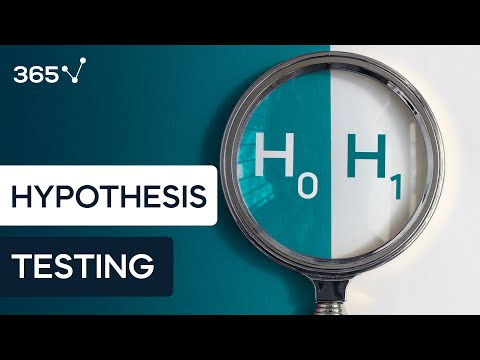

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

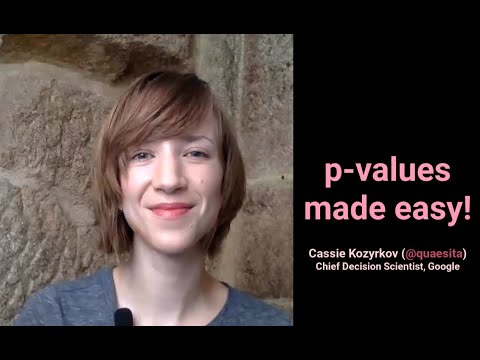

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

### Problem Introduction
In this experiment, we seek to test whether students in STA130 can correctly identify whether tea or milk was poured first when tasting a cup of tea. This is based on the classic tea-tasting experiment proposed by Ronald Fisher, where a subject (Dr. Muriel Bristol) claimed she could tell the difference between tea prepared with milk poured first and tea poured first. Fisher used this opportunity to develop a hypothesis test. In the present experiment, we randomly selected 80 STA130 students to participate and found that 49 of them were able to correctly identify the order of pouring.

We aim to determine whether this result provides evidence that students can differentiate between the pouring methods, or if their performance is simply due to random guessing.

### Description of the population (and sample) and parameter of interest (and corresponding observed test statistic)


Population: The population of interest includes all students who could potentially take the STA130 course and participate in the tea-tasting experiment.

Sample: The sample consists of 80 randomly selected STA130 students who each tasted one cup of tea and were asked whether the tea or milk was poured first. Out of these, 49 students correctly identified the order.

Parameter of Interest: The parameter we are interested in is the true proportion p of STA130 students who can correctly identify whether tea or milk was poured first. The sample proportion (\p̂) is 49/80 or 0.6125.

Observed Test Statistic: The observed test statistic is the sample proportion p̂ =0.6125.



### Formal Null and Alternative Hypotheses

#### **Formal Null Hypothesis (H₀)**:
- **Formal Version**: 
  \( H_0: p = 0.5 \)
  Where \( p \) represents the true proportion of STA130 students who can correctly identify whether milk or tea was poured first. Under the null hypothesis, it is assumed that students are guessing, so the probability of correctly identifying the order is 50%.

#### **Informal Interpretive Statement for the Null Hypothesis**:
- **Casual Version**: 
  The null hypothesis assumes that students can't really tell whether the tea or milk was poured first—they are just guessing, and there’s an equal 50% chance that they’ll be right or wrong. It's like flipping a coin.

#### **Alternative Hypothesis (H₁)**:
- **Formal Version**: 
  \( H_1: p > 0.5 \)
  This states that the true proportion of students who can correctly identify whether milk or tea was poured first is greater than 50%. In other words, students are doing better than just guessing.

#### **Informal Interpretive Statement for the Alternative Hypothesis**:
- **Casual Version**: 
  The alternative hypothesis suggests that students are not just guessing—they can actually tell whether the tea or milk was poured first. So more than half of the students should be able to get it right.

---

The null hypothesis tests the assumption that students are randomly guessing, while the alternative hypothesis suggests that the students have a real ability to distinguish the order in which the tea or milk was poured.

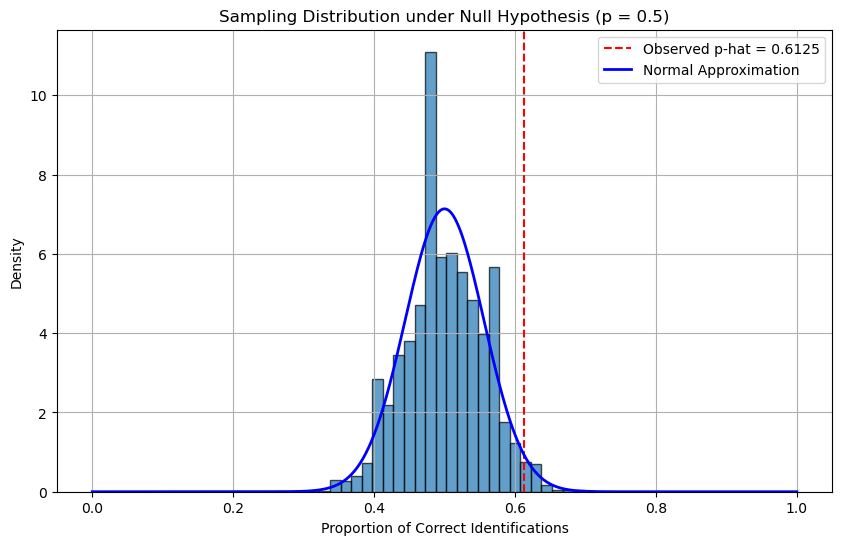

Observed proportion (p-hat): 0.6125
Simulated p-value: 0.0268
Test statistic (Z): 2.0125
P-value from hypothesis test: 0.0221

Since the p-value (0.0268) < alpha (0.05), we reject the null hypothesis.
There is evidence that students can identify the pouring order better than guessing.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
n = 80  # Number of students
p_null = 0.5  # Null hypothesis proportion (random guessing)
observed_successes = 49  # Number of correct identifications
alpha = 0.05  # Significance level

# Observed sample proportion
p_hat = observed_successes / n

# Step 1: Simulate the sampling distribution under the null hypothesis
simulations = 10000  # Number of simulated experiments
binom_samples = np.random.binomial(n, p_null, simulations) / n

# Step 2: Calculate the p-value based on the simulation
p_value_simulation = np.mean(binom_samples >= p_hat)

# Step 3: Calculate the Z-test statistic (normal approximation)
se = np.sqrt(p_null * (1 - p_null) / n)  # Standard error
test_stat = (p_hat - p_null) / se  # Z-test statistic
p_value_test = 1 - norm.cdf(test_stat)  # P-value from normal distribution (one-tailed test)

# Step 4: Visualization
plt.figure(figsize=(10, 6))
plt.hist(binom_samples, bins=30, edgecolor='black', alpha=0.7, density=True)
plt.axvline(p_hat, color='red', linestyle='--', label=f'Observed p-hat = {p_hat:.4f}')

# Create a normal distribution curve for visualization
x = np.linspace(0, 1, 1000)
y = norm.pdf(x, loc=p_null, scale=se)  # Probability density function of the normal distribution
plt.plot(x, y, color='blue', lw=2, label='Normal Approximation')

plt.title('Sampling Distribution under Null Hypothesis (p = 0.5)')
plt.xlabel('Proportion of Correct Identifications')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Step 5: Output the results
print(f"Observed proportion (p-hat): {p_hat:.4f}")
print(f"Simulated p-value: {p_value_simulation:.4f}")
print(f"Test statistic (Z): {test_stat:.4f}")
print(f"P-value from hypothesis test: {p_value_test:.4f}")

# Step 6: Conclusion
if p_value_simulation < alpha:
    print(f"\nSince the p-value ({p_value_simulation:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("There is evidence that students can identify the pouring order better than guessing.")
else:
    print(f"\nSince the p-value ({p_value_simulation:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that students can identify the pouring order better than guessing.")


Simulating the Sampling Distribution under H₀: We simulate 10,000 trials where each student guesses with a 50% success rate to generate a sampling distribution under the null hypothesis. This provides a reference distribution for comparison.

Hypothesis Test Statistic: The test statistic is computed by comparing the observed sample proportion to the null hypothesis proportion of 0.5, normalized by the standard error. This statistic tells us how many standard deviations the observed result is from the null hypothesis expectation.

P-value Calculation: The p-value from the hypothesis test is the probability of observing a result as extreme as the calculated test statistic under the null hypothesis. This value helps determine whether the observed difference is statistically significant.

Visualization: The histogram of the simulated sampling distribution shows the range of sample proportions we would expect if students were guessing. The observed sample proportion is marked to visualize how it compares to the distribution.